# R Exercise 1 - Filippo Conforto

In [1]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Part 1

In [89]:
l_name = c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay","Loch Awe",
           "Loch Maree","Loch Ericht", "Loch Lochy","Loch Rannoch","Loch Shiel",
           "Loch Katrine","Loch Arkaig" ,"Loch Shin")
vol = c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

area = c(56.0,71.0,27.0,26.4,39.0,28.6,18.6,16.0,19.0,19.5,12.4,16.0,22.5)
len = c(39.0,36.0,18.8,23.0,41.0,20.0,23.0,16.0,15.7,28.0,12.9,19.3,27.8)
max_d = c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_d = c( 132.0,37.0,87.0,60.6,32.0,38.0,57.6,70.0,51.0,40.0,43.4,46.5,15.5)

In [90]:
lakes = data.frame(Loch = l_name, Volume = vol, Area = area, Length = len, Max_Depth = max_d, Mean_Depth = mean_d)

In [91]:
lakes[order(lakes$Volume),][1,]$Loch
lakes[order(lakes$Volume, decreasing = TRUE),][1,]$Loch
lakes[order(lakes$Area),][1,]$Loch
lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch

[1] "Loch Shin"

[1] "Loch Ness"

[1] "Loch Katrine"

[1] "Loch Lomond"

In [93]:
lakes[order(lakes$Area, decreasing = TRUE),]

,Loch,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [94]:
lakes[0:2,]

,Loch,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Loch Ness,7.45,56,39,230,132
2,Loch Lomond,2.60,71,36,190,37


In [100]:
sum(lakes$Area)

[1] 372

## Part 2


In [105]:
oildata = read.table("DATA/crude-oil-prices.csv", sep = ",", header = T)

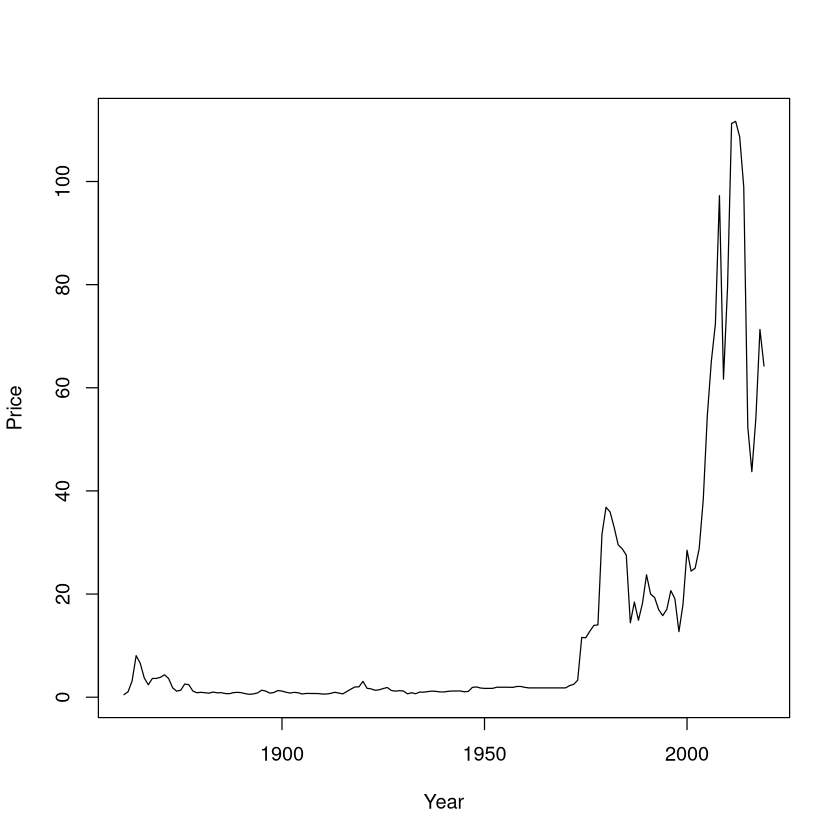

In [109]:
plot(oildata$Year, oildata$Oil, t="l", xlab = "Year", ylab = "Price")

In [116]:
oildata[order(oildata$OilPrice, decreasing = T),][1,]$OilPrice
oildata[order(oildata$OilPrice, decreasing = T),][1,]$Year

[1] 111.6697

[1] 2012

In [125]:
der = oildata[2:nrow(oildata),]$OilPrice - oildata[1:nrow(oildata)-1,]$OilPrice

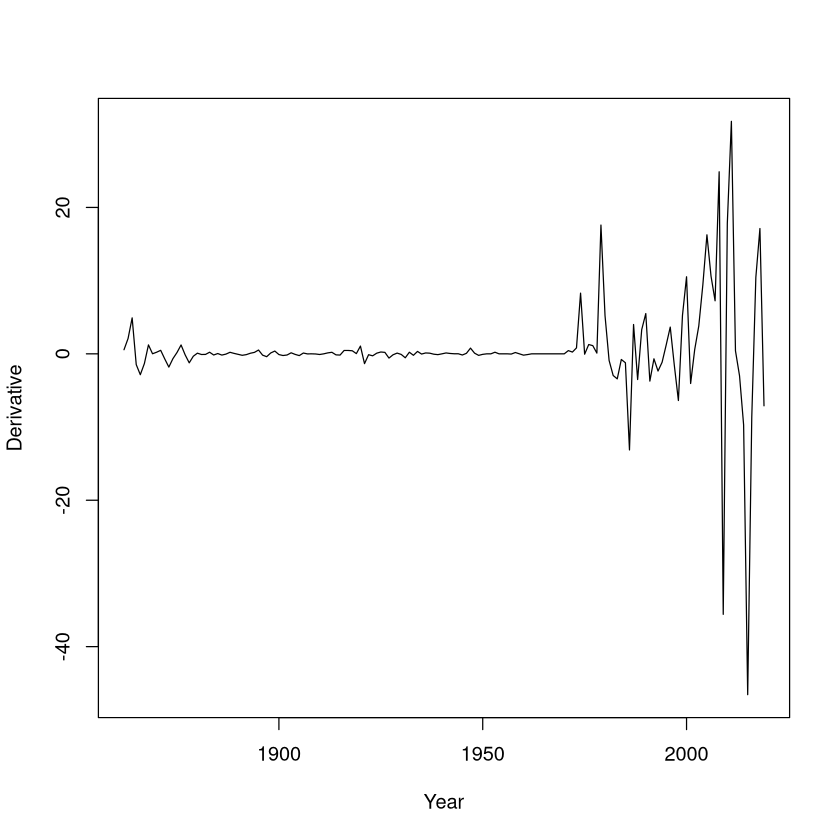

In [130]:
plot(oildata$Year[-1], der, t="l", xlab = "Year", ylab = "Derivative")

## Part 3

In [7]:
coaldata = tibble(read_csv("DATA/coal-production-by-country.csv"))



── Column specification ──────────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




In [76]:
not_cnt = c("Europe","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")
for (c in not_cnt){
    coaldata = coaldata[coaldata$Entity != c,]
}
un_cnt = unique(coaldata$Entity)


In [77]:
#cnt = setdiff(un_cnt, not_cnt)

In [78]:
length(un_cnt)

[1] 184

In [79]:
counts = table(coaldata$Entity)
dimnames(counts) = NULL

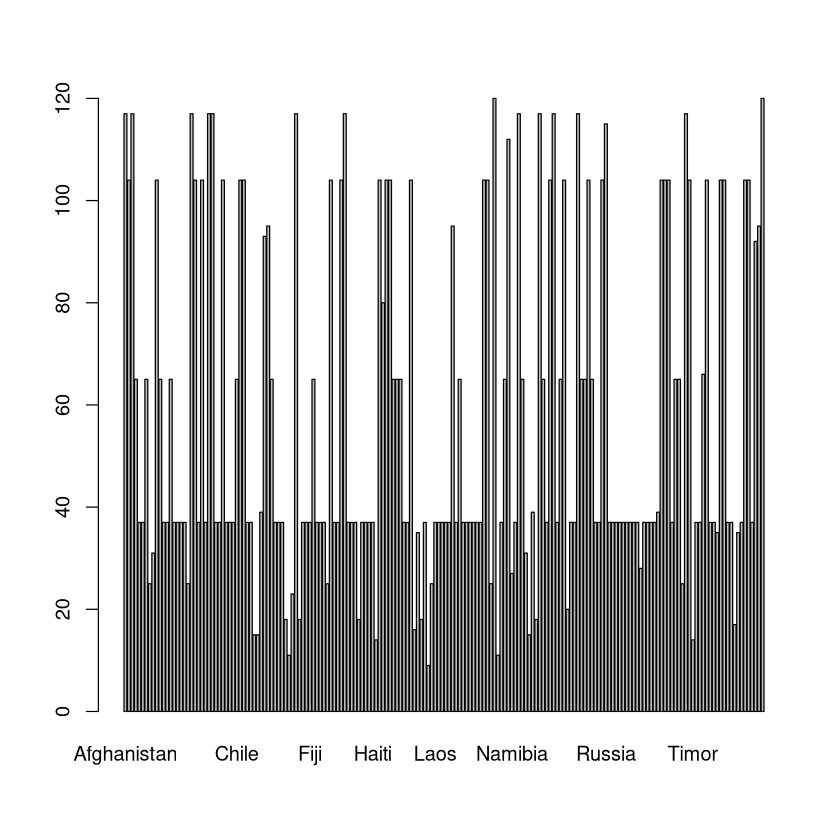

In [80]:
barplot(counts, names.arg = un_cnt)

In [81]:
coaldata70 = coaldata[coaldata$Year > 1970,]

In [82]:
agg_coal = aggregate(coaldata70[4], by= list(coaldata70$Entity), FUN = sum)

In [83]:
agg_coal[order(agg_coal$C, decreasing = TRUE),][1:5,]

,Group.1,Coal production (TWh)
,<chr>,<dbl>
29,China,459564.65
109,North America,244443.42
152,United States,226068.84
121,Russia,98251.65
8,Australia,83077.07


In [84]:
top_cnt = agg_coal[order(agg_coal$C, decreasing = TRUE),][1:5,]$Group.1

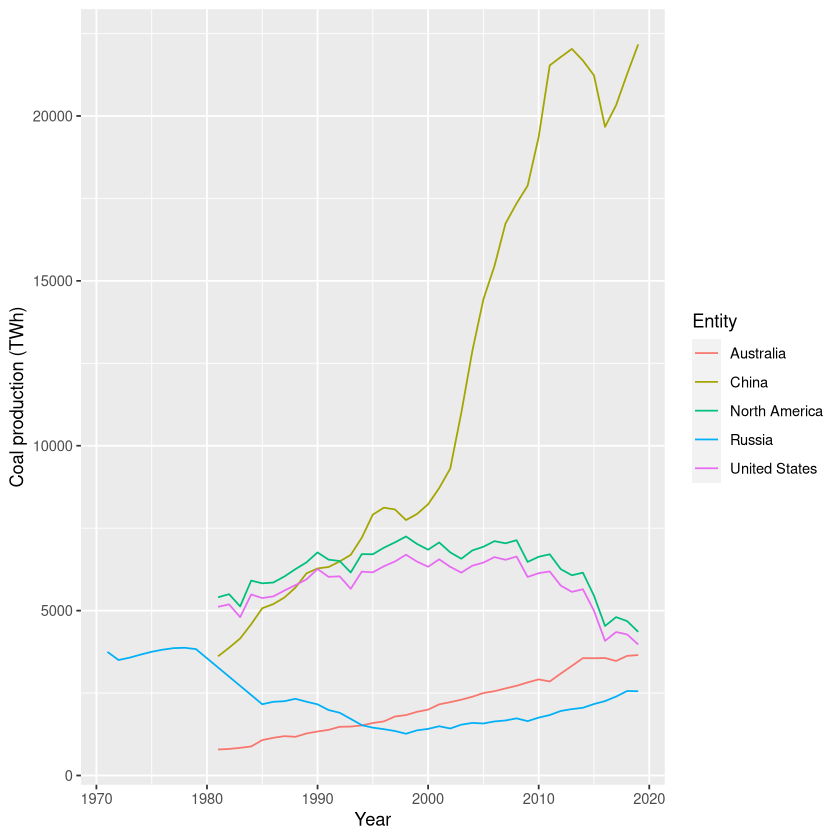

In [127]:
ggplot ( subset(coaldata70,Entity %in% top_cnt)) + aes ( x = Year, y = `Coal production (TWh)`, group = Entity, colour = Entity) + geom_line()


## Plot 4

In [178]:
data_covid = tibble(read_csv("DATA/vaccinations-by-manufacturer.csv"))


── Column specification ──────────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




In [179]:
data_ita = filter(data_covid, location == "Italy")

data_ita$date = strptime(data_ita$date, "%d/%m/%Y")

In [181]:
data_ita$date = as.POSIXct(data_ita$date)

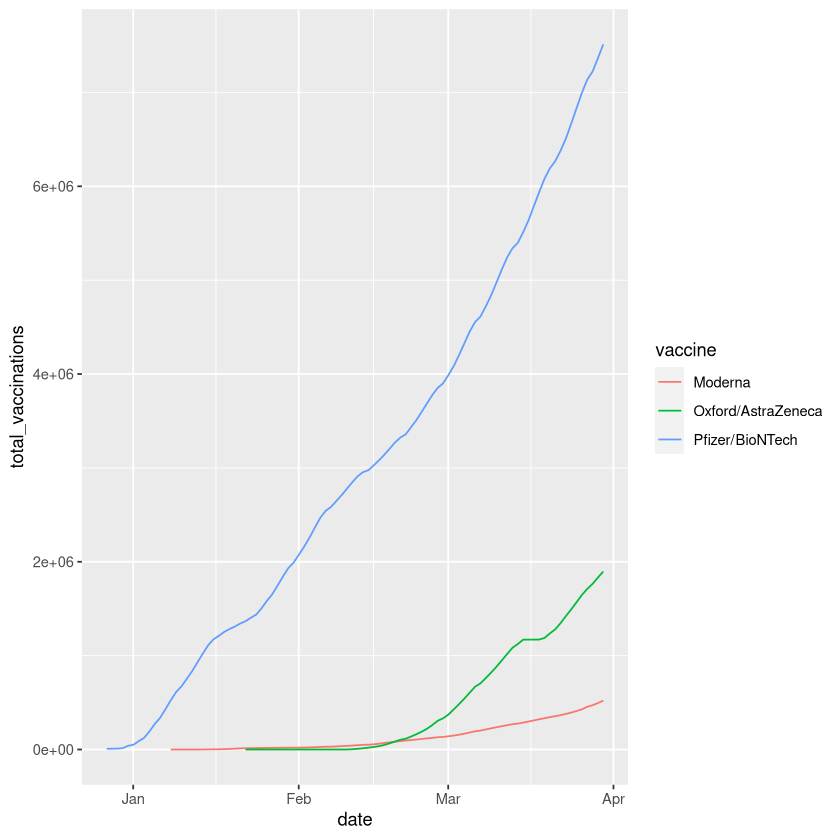

In [182]:
ggplot (data_ita, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line()


In [203]:
data_agg = aggregate(data_ita$total_vaccinations, by= list(data_ita$date), FUN = sum)

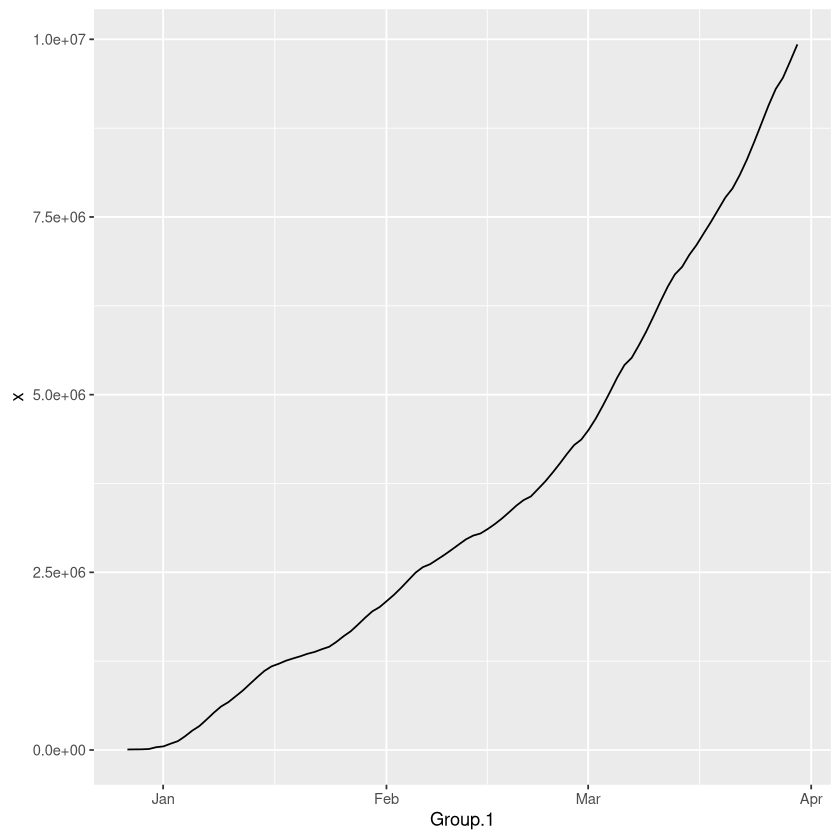

In [206]:
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line()
